In [1]:
import geopandas as gpd
import pandas as pd
from google_geocoding import *
from feature_dev import *
from utils import *

%load_ext autoreload
%autoreload 2

# pd.set_option('display.max_rows', None)

# Driving Travel Times

In [2]:
gdf = load_station_points()
df = construct_ods_for_routing(gdf)

In [3]:
# modes = ['driving']
# query_routes(df, modes)

In [4]:
construct_driving_summary(df).to_csv('google_driving_summaries.csv')

# Bus Travel Times

In [ ]:
# gdf = load_station_points()
# dfs = construct_grouped_ods_for_routing(gdf)

# # Pickle groups
# with open('transit_group_dataframes.pickle', 'wb') as handle:
#     pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open('transit_group_dataframes.pickle', 'rb') as handle:
    dfs = pickle.load(handle)

In [ ]:
# modes = [('transit','bus')]
# query_grouped_routes(dfs, modes)

In [10]:
bus_summaries = construct_bus_transit_summary(dfs)
bus_summaries.to_csv('google_transit_bus_summaries.csv')

# Bus Competativeness with Metro

In [24]:
metro_tt = pd.read_csv('metro_travel_times.csv')
df = calculate_bus_competativeness_index(metro_tt, bus_summaries)
cols = {
    'station_name_o':'station_name_o',
    'station_name_d':'station_name_d',
    'google_transit_minutes':'bus_transit_minutes',
    'metro_minutes':'metro_transit_minutes',
    'bus_competativeness_index':'bus_competativeness_index',
}
df = df[cols.keys()].rename(columns=cols)

df.to_csv('bus_competativeness_index.csv')

df.sort_values('bus_competativeness_index', ascending=False)

,station_name_o,station_name_d,bus_transit_minutes,metro_transit_minutes,bus_competativeness_index
5263,Glenmont,White Flint,21.30,60,2.816901
5894,Medical Center,Wheaton,19.82,51,2.573158
6219,College Park-U of Md,New Carrollton,21.83,56,2.565277
5471,Wheaton,Twinbrook,23.85,60,2.515723
8535,Suitland,Addison Road,17.50,42,2.400000
...,...,...,...,...,...
2464,Judiciary Square,Deanwood,NaN,30,0.000000
1689,Federal Center SW,Forest Glen,NaN,37,0.000000
1690,Federal Center SW,Greenbelt,NaN,37,0.000000
1691,Federal Center SW,Medical Center,NaN,35,0.000000


<Axes: >

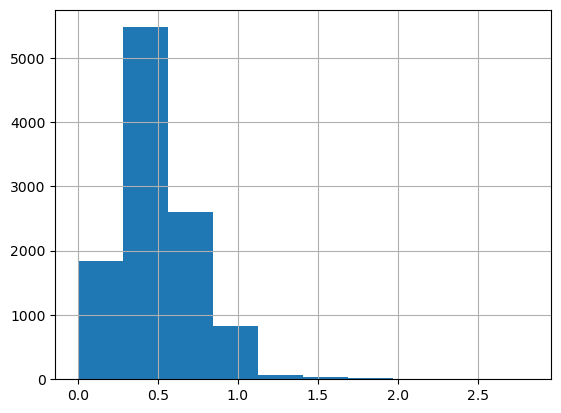

In [25]:
df.bus_competativeness_index.hist()